# Análisis computational de datos lingüísticos - 2021
### análisis estadísticos (más o menos básicos)

## 1. Datos programas presidenciales

### agradecimientos a https://github.com/rivaquiroga/programas-presidenciales-2021

In [1]:
## datos

import glob as glob

files = glob.glob('programas-primera-vuelta/*.txt')

In [99]:
files[0]

'programas-primera-vuelta\\artes.txt'

In [2]:
files = [x.split('\\')[1] for x in files]

In [3]:
files

['artes.txt',
 'boric.txt',
 'kast.txt',
 'meo.txt',
 'parisi.txt',
 'provoste.txt',
 'sichel.txt']

In [4]:
datos = {fp.replace('.txt',''):open('programas-primera-vuelta/'+fp, "r", encoding="utf-8").read() for fp in files}

In [5]:
datos['artes'][:100]

'CHILE: AVANZAN YA, ¡BANDERAS DE UNIDAD!\nEl programa político que presentamos, los partidos y movimie'

In [6]:
for candidatx in datos.keys():
    datos[candidatx]=datos[candidatx].replace('\n',' ')

In [7]:
datos['artes'][:100]

'CHILE: AVANZAN YA, ¡BANDERAS DE UNIDAD! El programa político que presentamos, los partidos y movimie'

In [8]:
from nltk import sent_tokenize

In [9]:
datos = {candidatx:sent_tokenize(datos[candidatx]) for candidatx in datos.keys()}

In [11]:
for candidatx in datos.keys():
    print(candidatx,len(datos[candidatx]))

artes 87
boric 2436
kast 3287
meo 1787
parisi 1227
provoste 3294
sichel 1439


In [13]:
import string

def remover_puntuacion(s): 
    for c in string.punctuation:
        s=s.replace(c,"")
    return s

In [14]:
datos_all = {candidatx:[] for candidatx in datos.keys()}

for candidatx in datos.keys():
    for sentence in datos[candidatx]:
        sentence = remover_puntuacion(sentence)
        doc = sentence.split(' ')
        datos_all[candidatx]+=[[token.lower() for token in doc]]

In [111]:
datos_all['kast'][:1]

[['atrévete',
  'chile',
  'un',
  'manifiesto',
  'republicano',
  'es',
  'innegable',
  'que',
  'chile',
  'atraviesa',
  'un',
  'momento',
  'decisivo',
  'en',
  'su',
  'historia']]

In [16]:
datos_all['parisi'][:1]

[['',
  'del',
  'partido',
  'de',
  'la',
  'gente',
  'pdg',
  'como',
  'partido',
  'soñamos',
  'con',
  'un',
  'chile',
  'más',
  'inclusivo',
  'y',
  'menos',
  'individualista']]

## 2. Histogramas de largos de oraciones

In [17]:
sentences = {}

In [18]:
for candidatx in datos_all.keys():
    sentences[candidatx] = [len(s) for s in datos_all[candidatx]]

In [20]:
sentences['provoste'][:10]

[33, 49, 18, 14, 17, 6, 18, 13, 19, 49]

In [22]:
import numpy as np

for candidatx in datos_all.keys():
    print(candidatx,np.round(np.mean(sentences[candidatx]),1),np.round(np.std(sentences[candidatx]),1))

artes 27.2 13.1
boric 29.2 18.3
kast 21.9 18.6
meo 32.4 18.9
parisi 25.4 22.4
provoste 22.2 18.6
sichel 22.6 17.2


In [23]:
colors = dict(zip(sentences.keys(),['orange','blue','red','gold','green','m','k','fuchsia']))

In [24]:
colors

{'artes': 'orange',
 'boric': 'blue',
 'kast': 'red',
 'meo': 'gold',
 'parisi': 'green',
 'provoste': 'm',
 'sichel': 'k'}

C:\Users\jxver\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\jxver\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


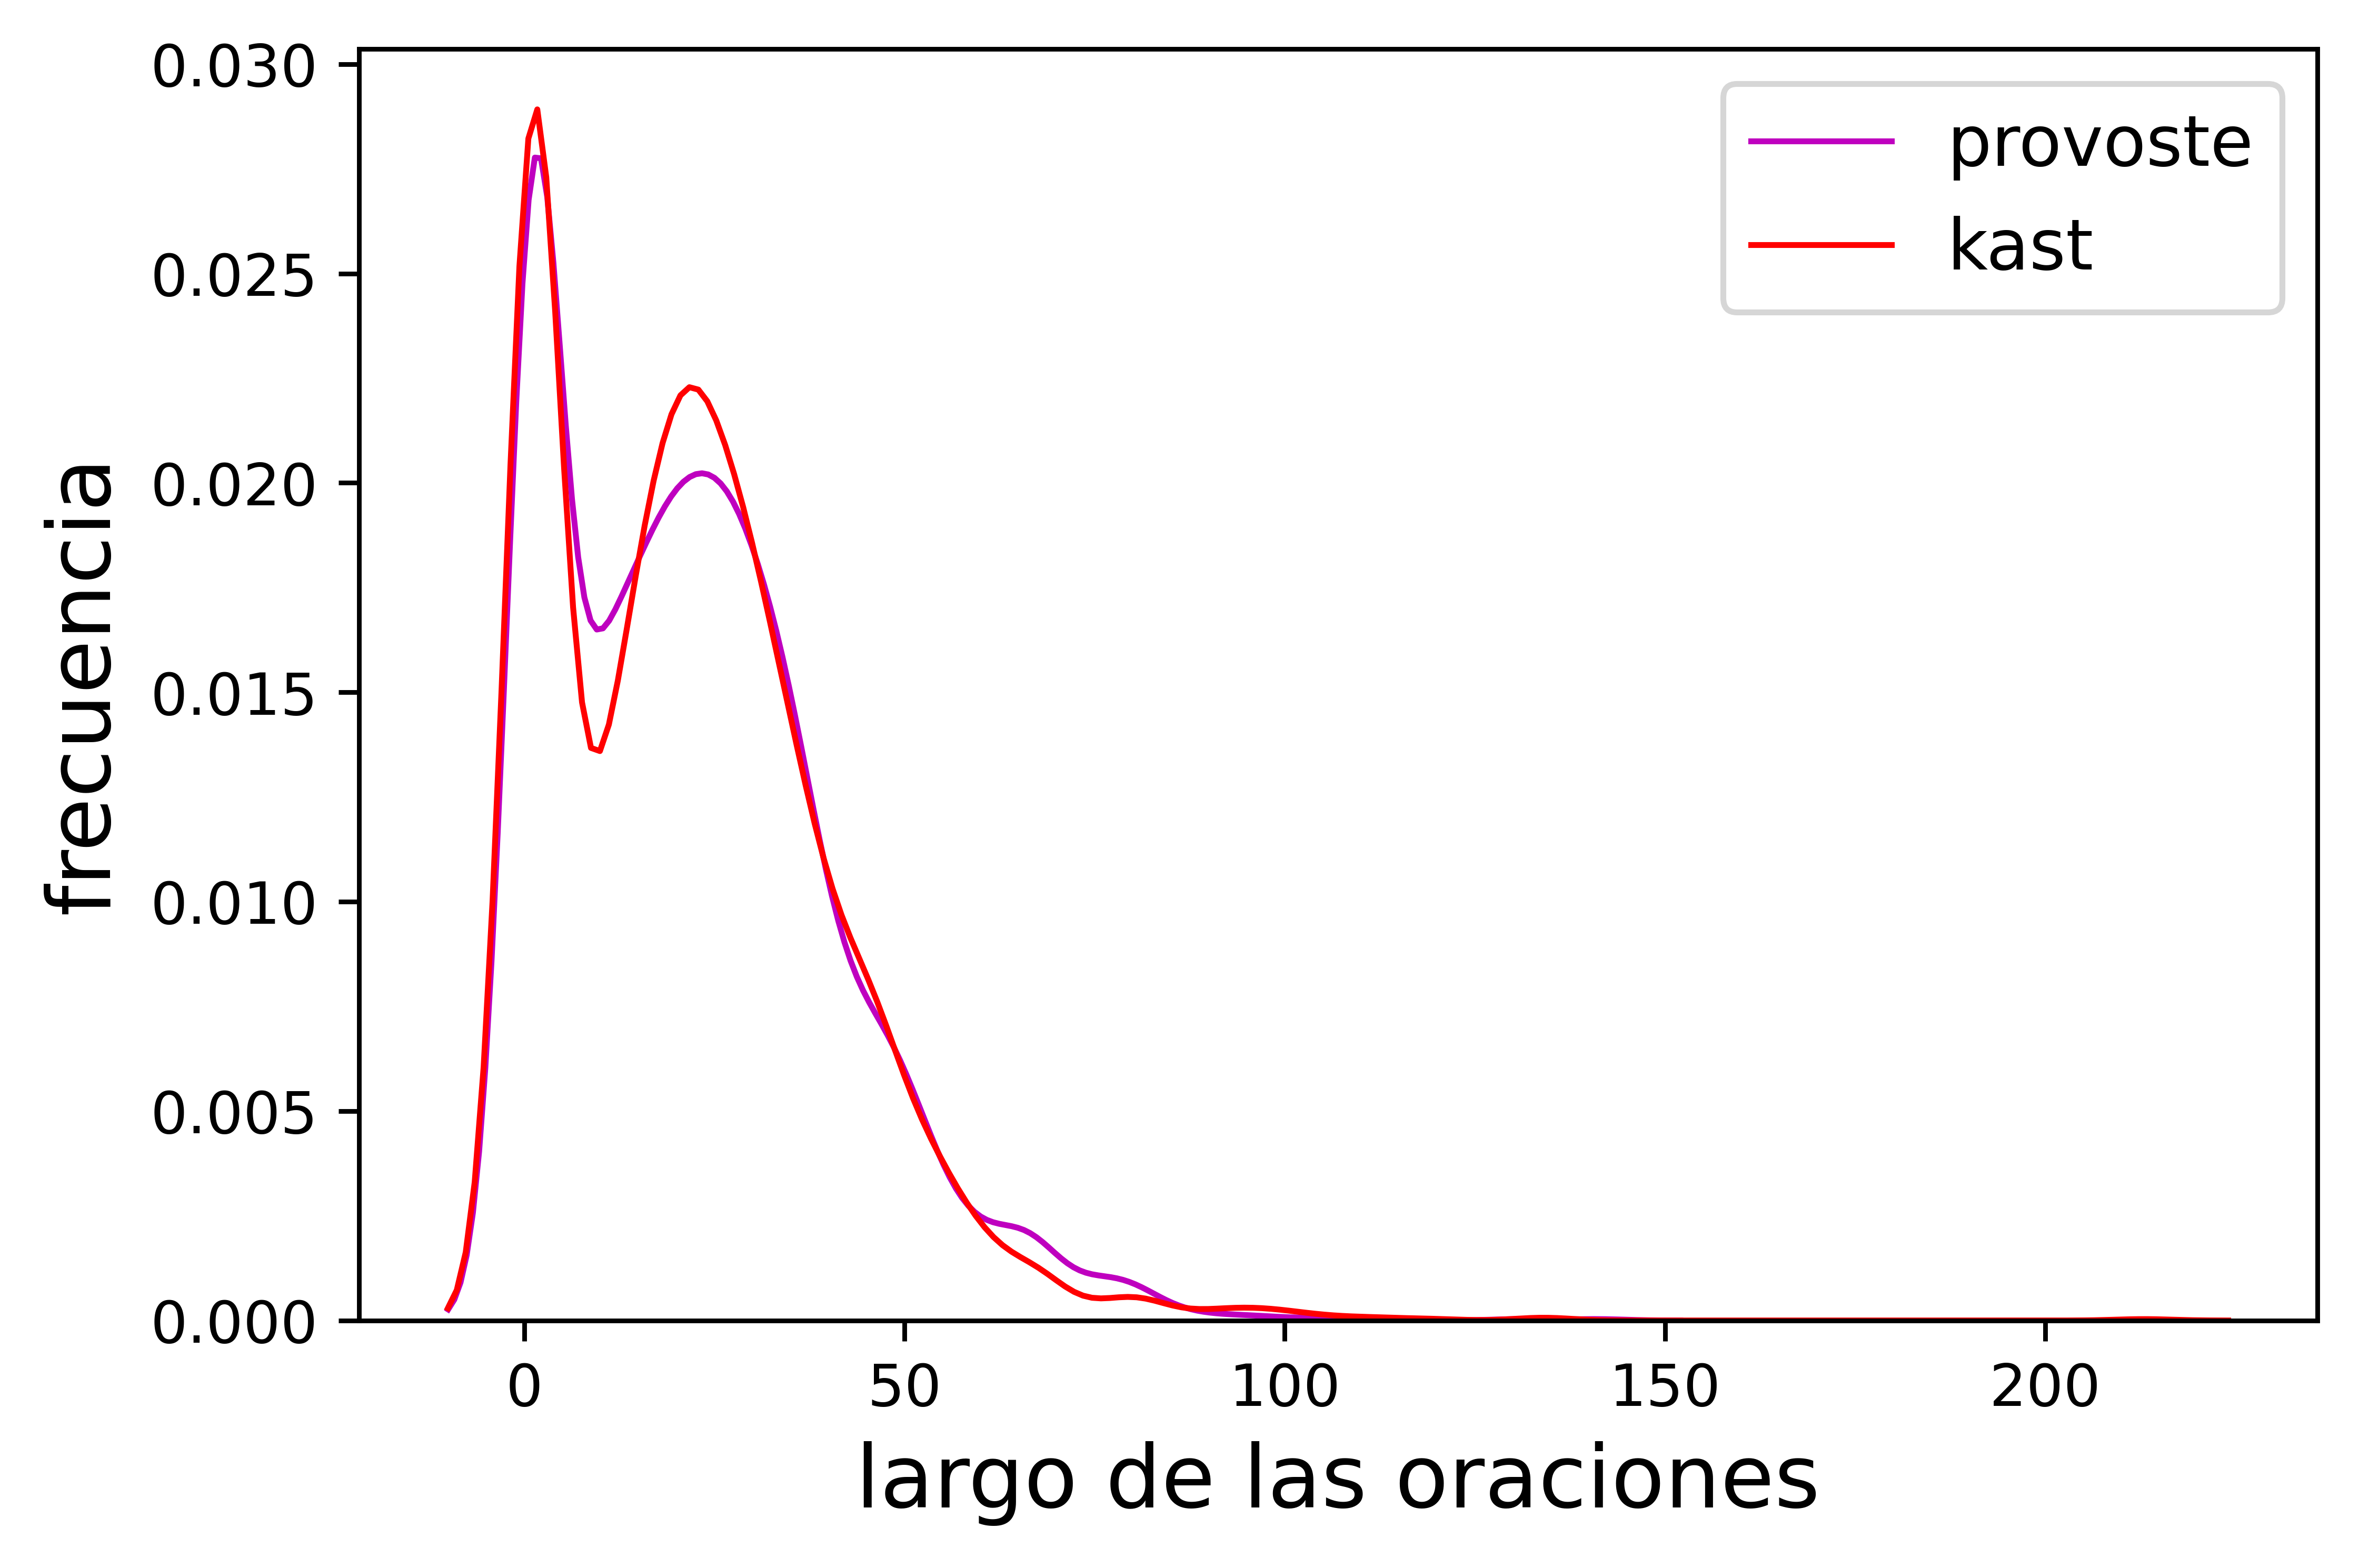

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)

for candidatx in ['provoste','kast']:#sentences.keys():

    ax = sns.distplot(sentences[candidatx],kde_kws={"color": colors[candidatx], "lw": 1, "linestyle":"-","label": candidatx},
                  hist_kws={"histtype": "step", "linewidth": 1,
                            "alpha": 1, "color": colors[candidatx]},hist=False)

plt.legend(loc='best',fontsize=12)
plt.xlabel(r'largo de las oraciones',fontsize=15)
plt.ylabel(r'frecuencia',fontsize=15)
plt.rcParams.update({'font.size': 10})
#plt.savefig('largo_oraciones.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

## 3. Frecuencias de palabras 1

In [35]:
tokens = {candidatx:[] for candidatx in sentences.keys()}

In [36]:
for candidatx in datos_all.keys():
    for sentence in datos_all[candidatx]:
        tokens[candidatx]+=sentence

In [38]:
num_tokens = {}

for candidatx in tokens.keys():
    num_tokens[candidatx]=len(tokens[candidatx]),len(set(tokens[candidatx]))

In [39]:
num_tokens

{'artes': (2365, 907),
 'boric': (71092, 7803),
 'kast': (71968, 10406),
 'meo': (57937, 7809),
 'parisi': (31168, 5942),
 'provoste': (73039, 9158),
 'sichel': (32533, 5687)}

In [40]:
type_token = {}

for candidatx in num_tokens.keys():
    number_tokens, number_types = num_tokens[candidatx]
    type_token[candidatx]=number_types/number_tokens

In [42]:
type_token

{'artes': 0.3835095137420719,
 'boric': 0.10975918528104428,
 'kast': 0.1445920409070698,
 'meo': 0.13478433470839016,
 'parisi': 0.19064425051334702,
 'provoste': 0.12538506825120826,
 'sichel': 0.17480711892539882}

In [43]:
{k: v for k, v in sorted(type_token.items(), key=lambda item: item[1])}

{'boric': 0.10975918528104428,
 'provoste': 0.12538506825120826,
 'meo': 0.13478433470839016,
 'kast': 0.1445920409070698,
 'sichel': 0.17480711892539882,
 'parisi': 0.19064425051334702,
 'artes': 0.3835095137420719}

In [49]:
## ¿Están influidos estos resultados por el tamaño de los corpus para cada candidatx?

TTR_sample = {candidatx:[] for candidatx in tokens.keys()} 

In [50]:
import random

A = [1,2,3,5,6,7]

random.sample(A,2)

[2, 3]

In [51]:
import random

S = 100
sampleo_size=0.9

for candidatx in tokens.keys():
    if candidatx!='artes':
        for s in range(S):
            parte = random.sample(tokens[candidatx],int(sampleo_size*len(tokens[candidatx])))
            TTR_sample[candidatx]+=[len(set(parte))/len(parte)]
    else:
        for s in range(S):
            parte = random.sample(tokens[candidatx],len(tokens[candidatx]))
            TTR_sample[candidatx]+=[len(set(parte))/len(parte)]

In [55]:
TTR_sample['boric'][:10]

[0.11554812290956831,
 0.11607952236566535,
 0.11598574599105999,
 0.11556375230533587,
 0.1154387171391954,
 0.11604826357413023,
 0.1160951517614329,
 0.11592322840798974,
 0.1154387171391954,
 0.11618892813603826]

In [56]:
for candidatx in TTR_sample.keys():
    print(candidatx,np.round(np.mean(TTR_sample[candidatx]),2),np.round(np.std(TTR_sample[candidatx]),5))

artes 0.38 0.0
boric 0.12 0.00028
kast 0.15 0.00035
meo 0.14 0.0004
parisi 0.2 0.00065
provoste 0.13 0.00032
sichel 0.18 0.00053


C:\Users\jxver\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jxver\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jxver\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

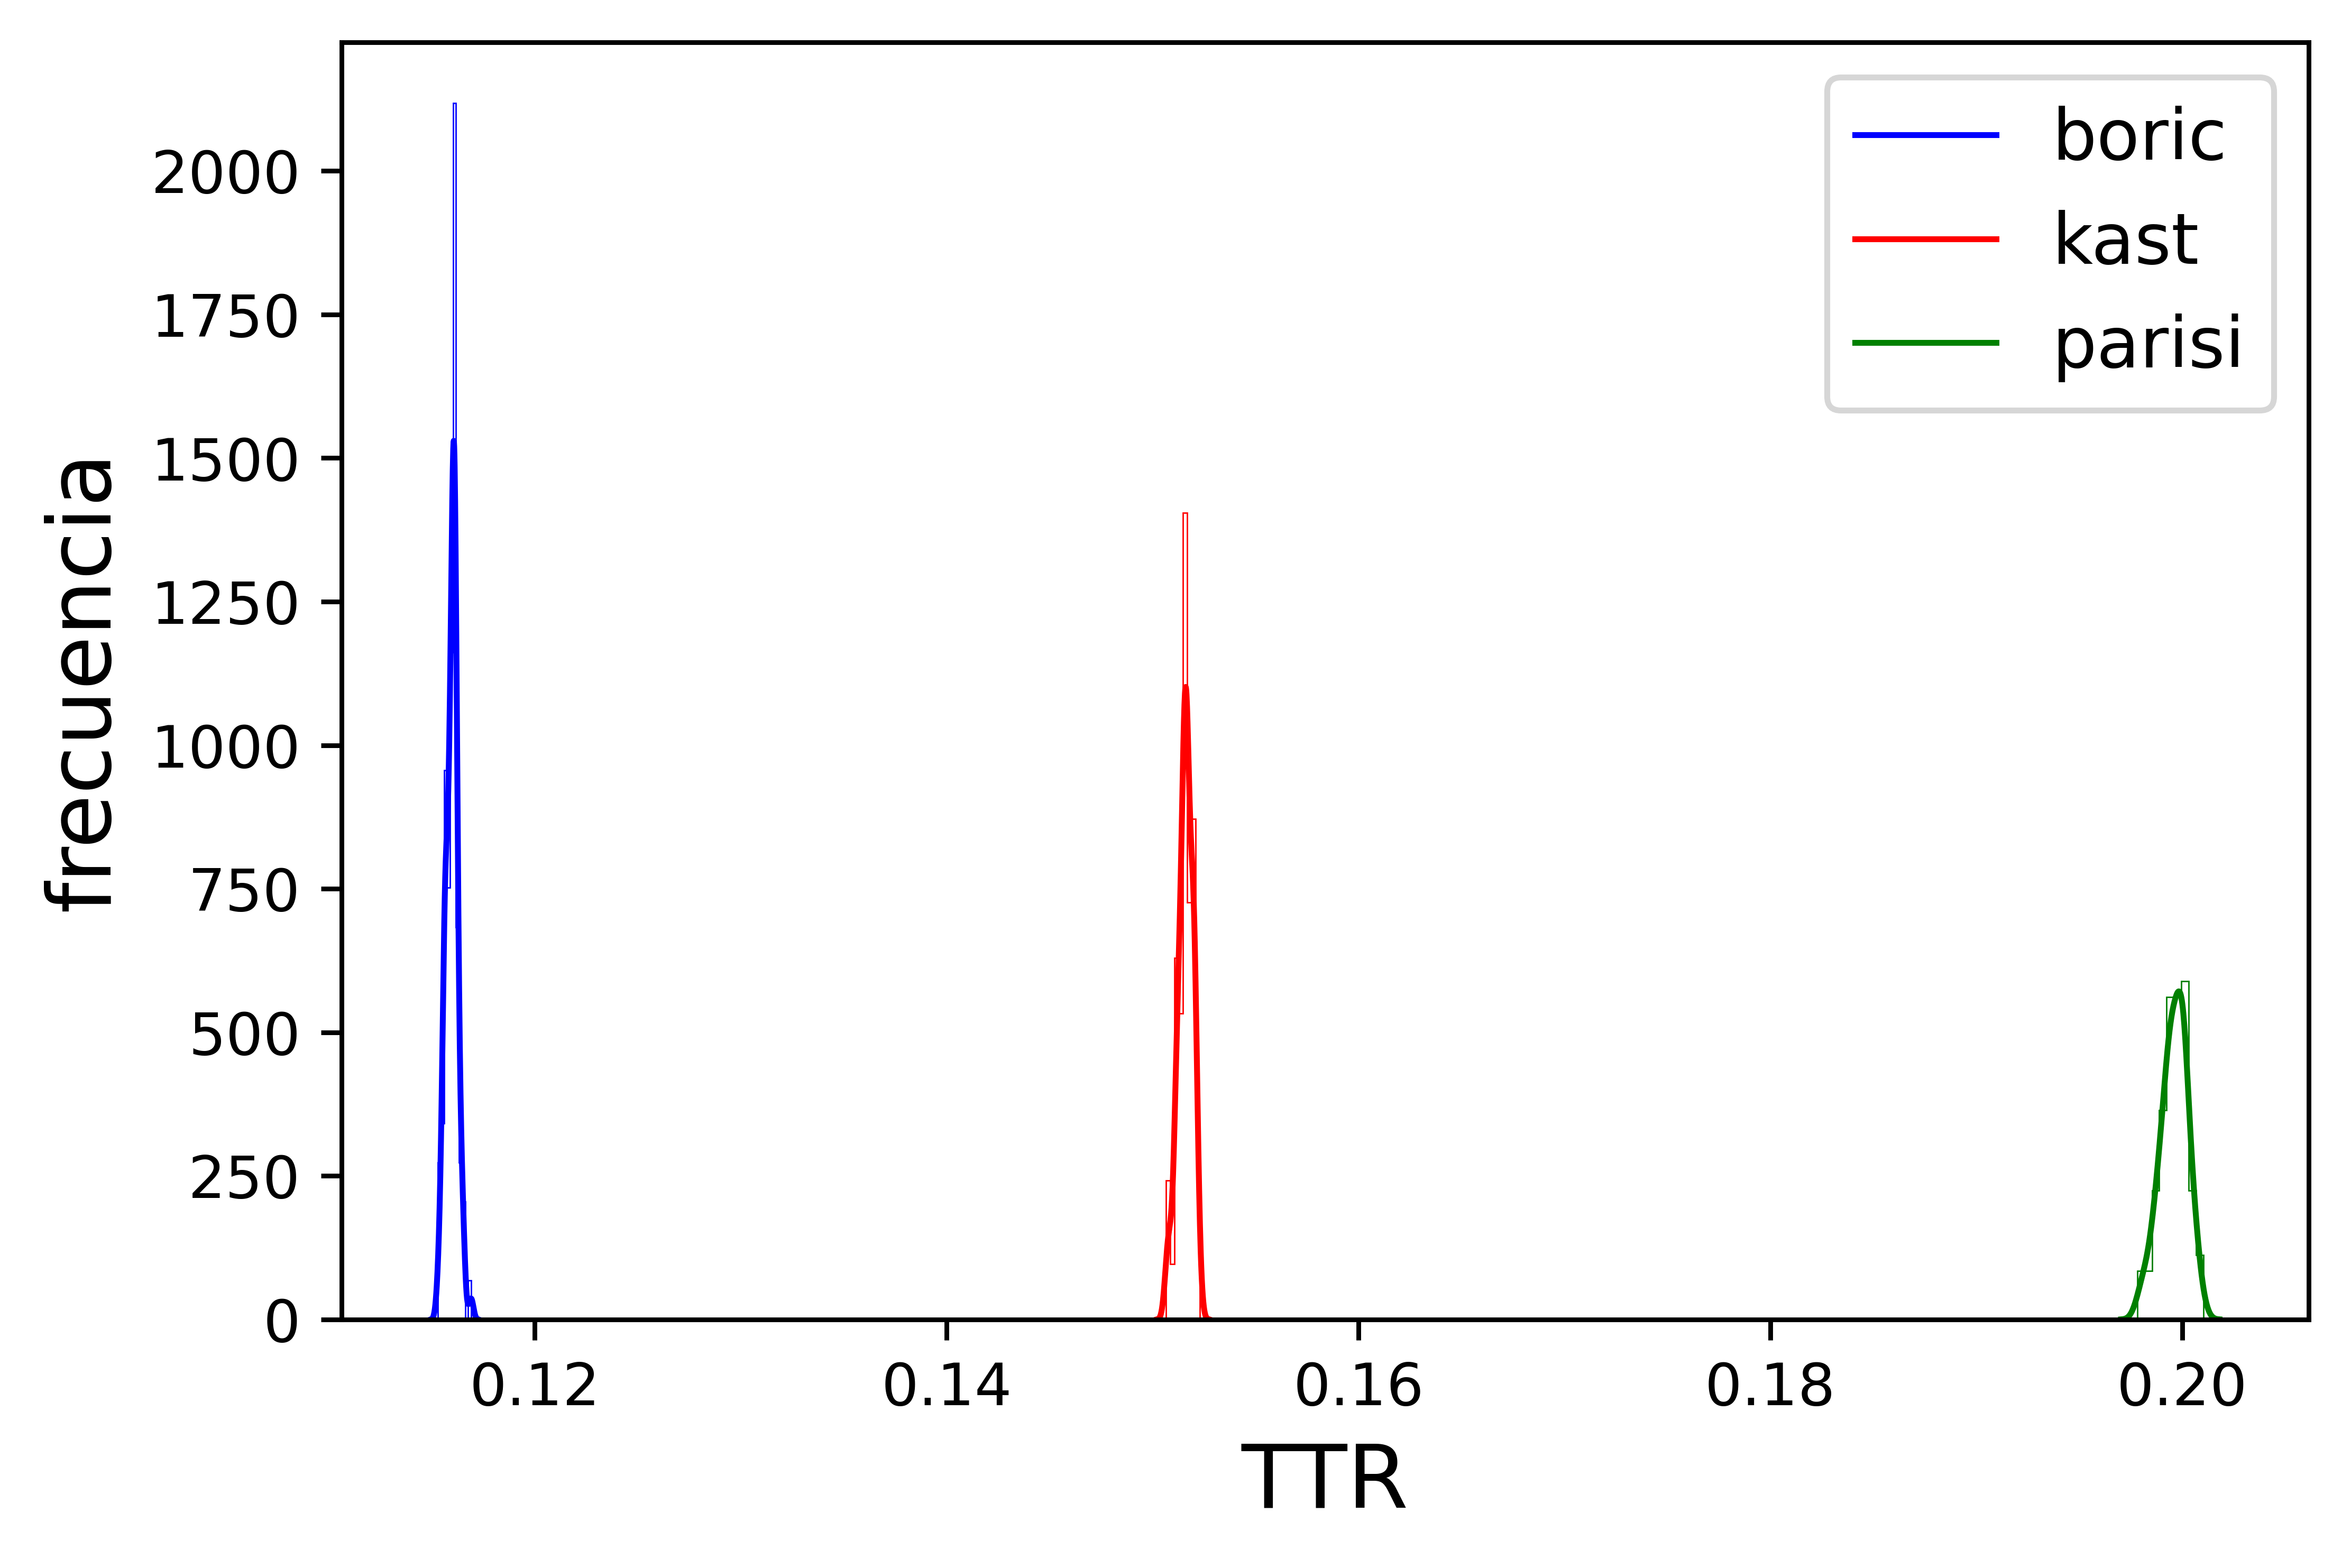

In [52]:
fig, ax = plt.subplots(dpi=800)

for candidatx in ['boric','kast','parisi']:

ax = sns.distplot(TTR_sample[candidatx],kde_kws={"color": 'k', "lw": 1, "linestyle":"-"},
                  hist_kws={"histtype": "step", "linewidth": 0.25,
                            "alpha": 1, "color": 'orange'},hist=True)

plt.legend(loc='best',fontsize=12)
plt.xlabel(r'índice de marcación',fontsize=15)
plt.ylabel(r'frecuencia',fontsize=15)
plt.rcParams.update({'font.size': 10})
#plt.savefig('largo_oraciones.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

## 4. Frecuencias de palabras 2

In [57]:
frecuencias = {}

In [58]:
from collections import Counter

for candidatx in tokens.keys():
    frecuencias[candidatx]=Counter(tokens[candidatx]).most_common(len(tokens[candidatx]))

In [59]:
frecuencias['boric'][:50]

[('de', 6326),
 ('y', 3335),
 ('la', 3184),
 ('en', 1917),
 ('el', 1696),
 ('a', 1436),
 ('que', 1413),
 ('las', 1363),
 ('los', 1262),
 ('para', 1028),
 ('del', 828),
 ('con', 802),
 ('se', 682),
 ('un', 673),
 ('una', 582),
 ('por', 489),
 ('como', 400),
 ('al', 328),
 ('su', 282),
 ('no', 271),
 ('desarrollo', 232),
 ('salud', 216),
 ('derechos', 216),
 ('estado', 211),
 ('es', 205),
 ('sistema', 196),
 ('ley', 187),
 ('sus', 181),
 ('e', 173),
 ('nacional', 167),
 ('personas', 164),
 ('educación', 152),
 ('políticas', 150),
 ('o', 144),
 ('lo', 143),
 ('', 141),
 ('sobre', 135),
 ('social', 135),
 ('trabajo', 132),
 ('entre', 130),
 ('más', 128),
 ('política', 127),
 ('participación', 125),
 ('este', 122),
 ('género', 121),
 ('chile', 110),
 ('acceso', 109),
 ('país', 108),
 ('esta', 106),
 ('protección', 104)]

In [61]:
frecuencias['artes'][:50]

[('de', 194),
 ('la', 112),
 ('y', 111),
 ('el', 61),
 ('a', 58),
 ('los', 55),
 ('del', 49),
 ('en', 42),
 ('se', 39),
 ('las', 37),
 ('un', 29),
 ('popular', 25),
 ('que', 23),
 ('una', 23),
 ('para', 23),
 ('estado', 20),
 ('al', 20),
 ('chile', 16),
 ('con', 15),
 ('nuevo', 15),
 ('gobierno', 14),
 ('pueblo', 14),
 ('nacional', 14),
 ('sistema', 14),
 ('por', 13),
 ('su', 11),
 ('será', 10),
 ('todos', 9),
 ('patriótico', 9),
 ('e', 8),
 ('país', 8),
 ('política', 8),
 ('trabajo', 8),
 ('programa', 7),
 ('más', 7),
 ('producción', 7),
 ('nueva', 7),
 ('como', 6),
 ('vida', 6),
 ('no', 6),
 ('hacia', 6),
 ('constitución', 6),
 ('orden', 6),
 ('personas', 6),
 ('trabajadores', 5),
 ('nuestro', 5),
 ('cada', 5),
 ('medidas', 5),
 ('grandes', 5),
 ('asamblea', 5)]

In [62]:
X_boric = list(range(len(frecuencias['boric'])))
Y_boric = []

for item in frecuencias['boric']:
    Y_boric += [item[1]]

In [63]:
X_kast = list(range(len(frecuencias['kast'])))
Y_kast = []

for item in frecuencias['kast']:
    Y_kast += [item[1]]

In [64]:
X_parisi = list(range(len(frecuencias['parisi'])))
Y_parisi = []

for item in frecuencias['parisi']:
    Y_parisi += [item[1]]

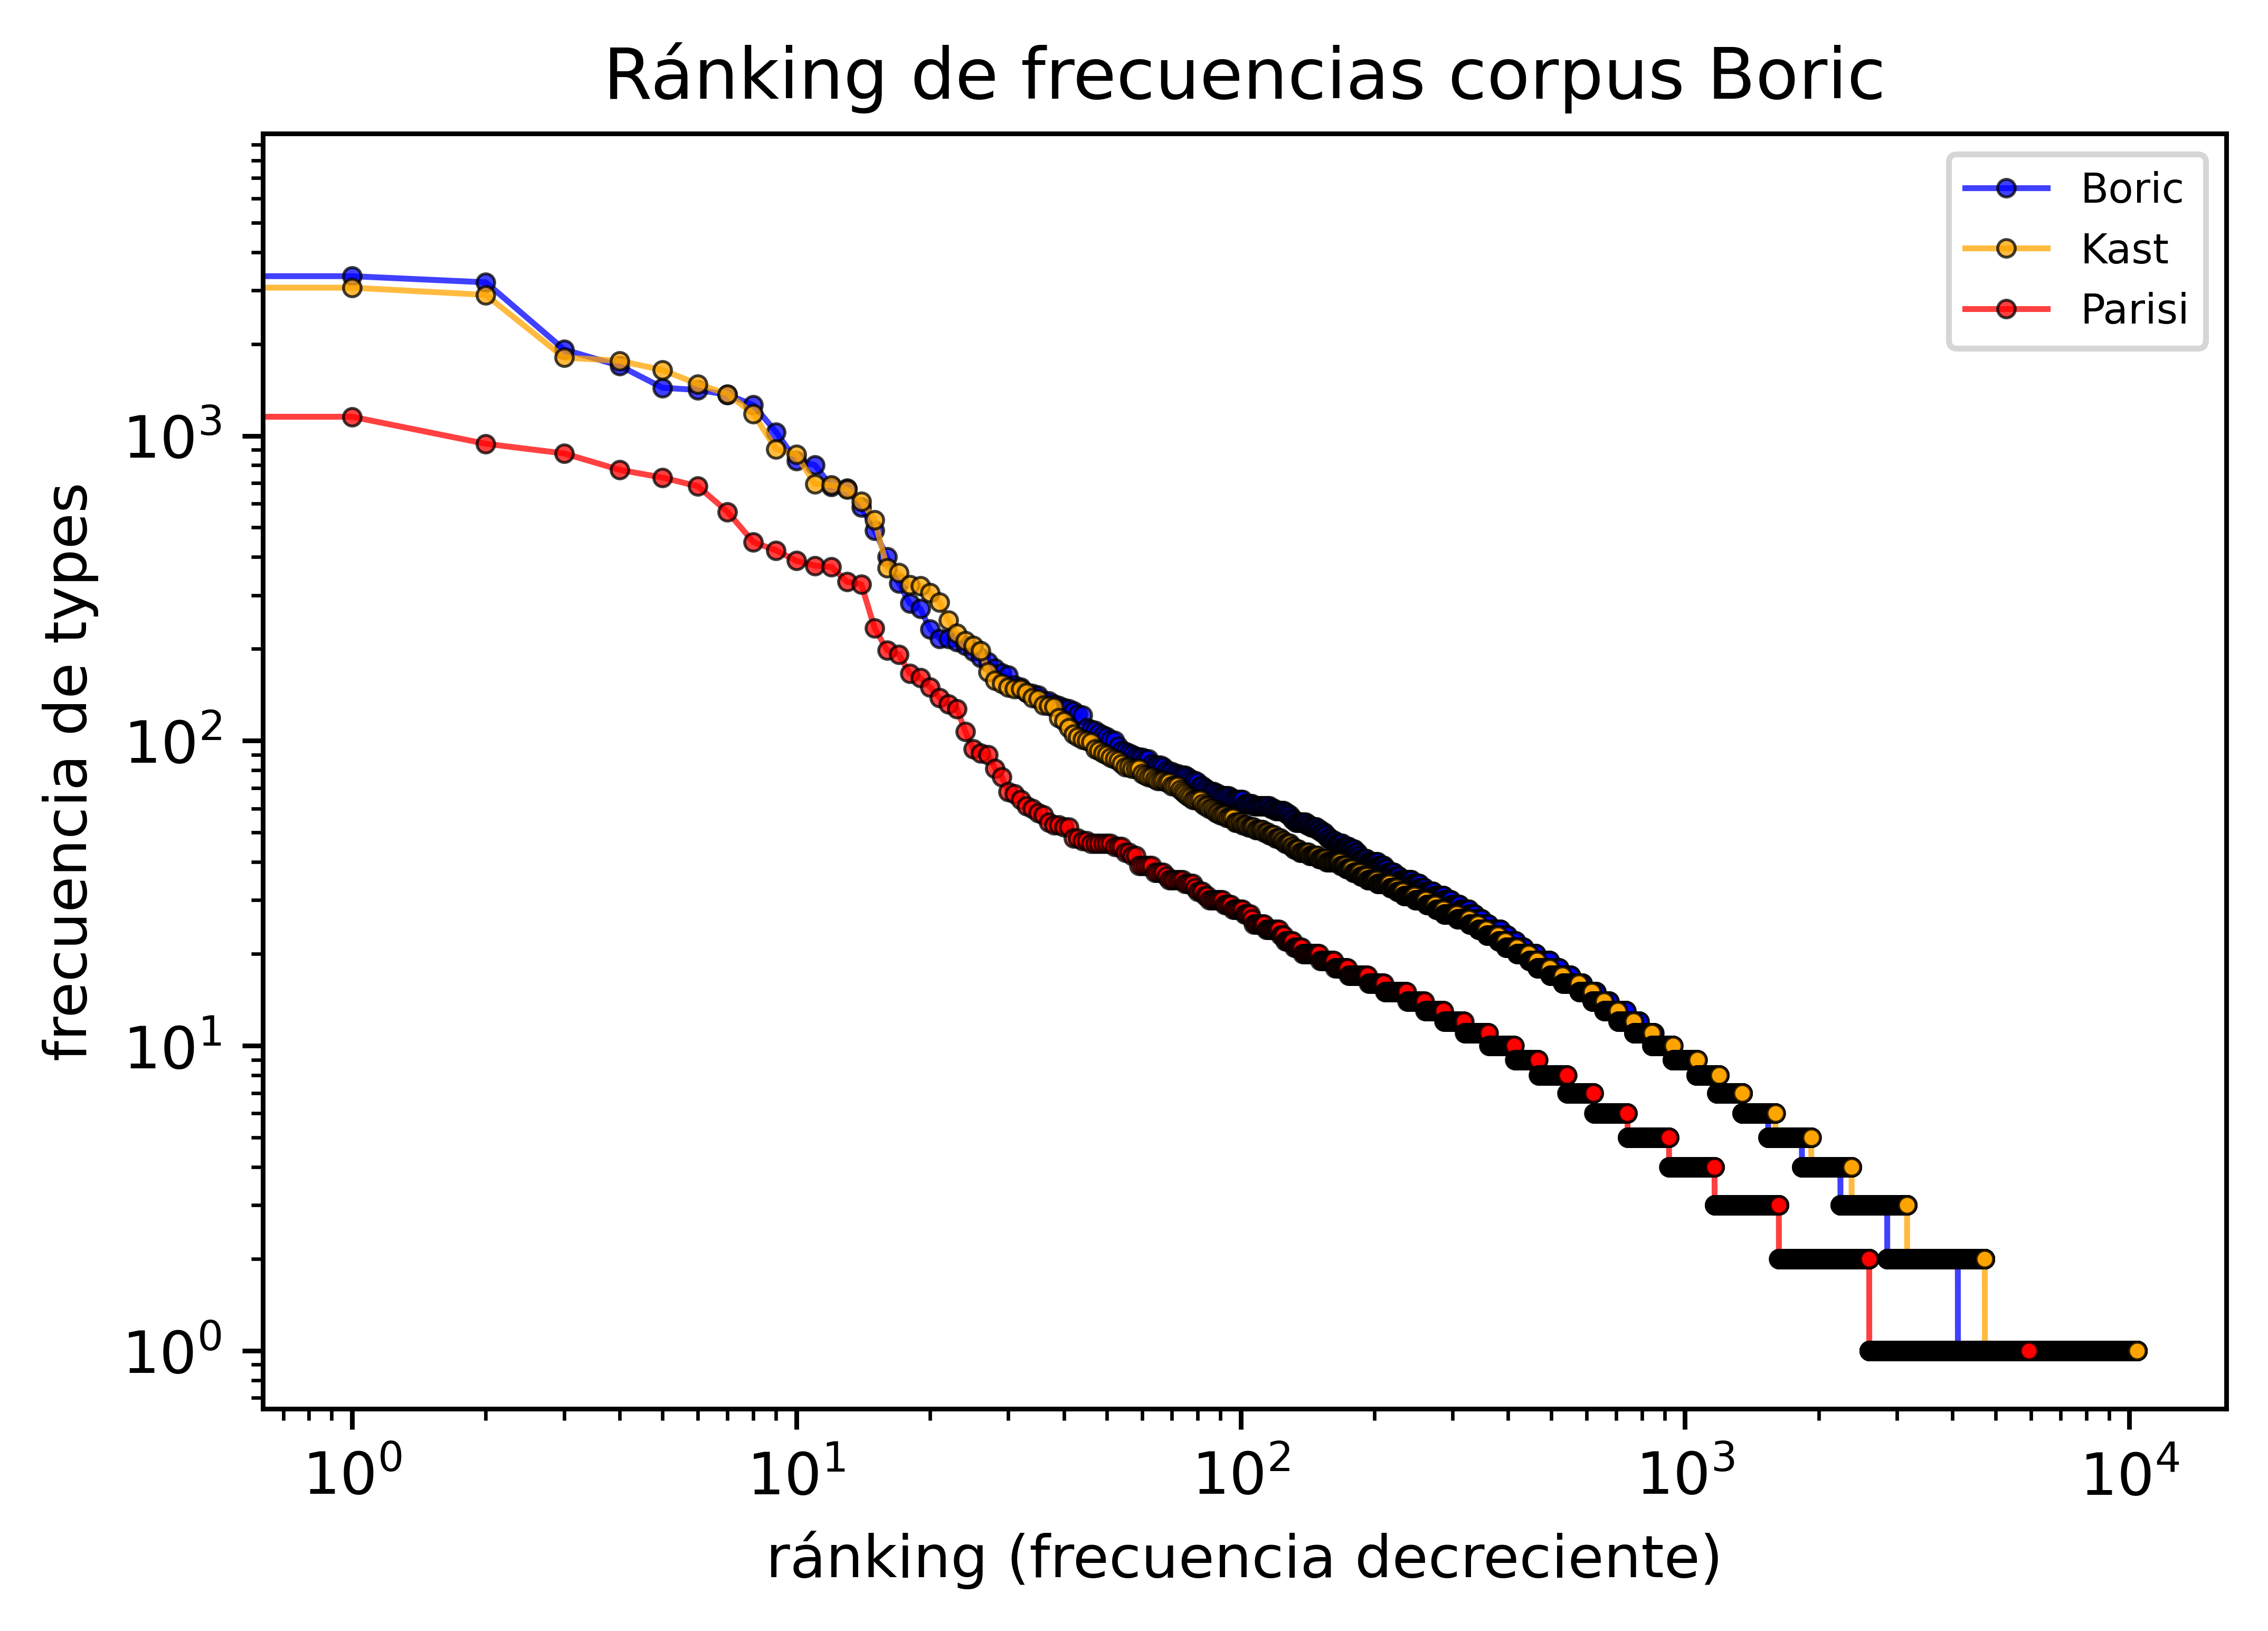

In [67]:
fig, ax = plt.subplots(dpi=800)

plt.title('Ránking de frecuencias corpus Boric',fontsize=12)

ax.loglog(X_boric,Y_boric,marker='o',color='blue',markersize=3,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,linewidth=1,fillstyle='full',label='Boric')
ax.loglog(X_kast,Y_kast,marker='o',color='orange',markersize=3,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,linewidth=1,fillstyle='full',label='Kast')
ax.loglog(X_parisi,Y_parisi,marker='o',color='r',markersize=3,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,linewidth=1,fillstyle='full',label='Parisi')

#plt.grid(False)
plt.legend(loc='best',fontsize=7)
plt.xlabel(r'ránking (frecuencia decreciente)',fontsize=10)
plt.ylabel(r'frecuencia de types',fontsize=10)
plt.rcParams.update({'font.size': 10})
#plt.savefig('K.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

## 5. Dificultad de lectura

In [69]:
datos = {fp.replace('.txt',''):open('programas-primera-vuelta/'+fp, "r", encoding="utf-8").read() for fp in files}

In [70]:
for candidatx in datos.keys():
    datos[candidatx]=datos[candidatx].replace('\n',' ')

In [71]:
!pip install textstat

In [73]:
import textstat

In [74]:
textstat.set_lang('es')

In [75]:
lecturabilidad = {}

In [76]:
## flesch_reading_ease: menor es más difícil
## fernandez_huerta: menor es más difícil
## szigriszt_pazos: menor es más difícil

for candidatx in datos.keys():
    lecturabilidad[candidatx]=textstat.flesch_reading_ease(datos[candidatx]),textstat.fernandez_huerta(datos[candidatx]),textstat.szigriszt_pazos(datos[candidatx])

In [79]:
lecturabilidad

{'artes': (29.35, 26.6, 25.32),
 'boric': (33.76, 36.3, 29.41),
 'kast': (46.63, 44.7, 42.25),
 'meo': (45.07, 42.5, 41.02),
 'parisi': (43.09, 44.5, 38.92),
 'provoste': (43.95, 43.5, 39.53),
 'sichel': (46.35, 48.5, 42.09)}

In [80]:
X=[]
for candidatx in lecturabilidad.keys():
    X+=[list(lecturabilidad[candidatx])]

In [81]:
X

[[29.35, 26.6, 25.32],
 [33.76, 36.3, 29.41],
 [46.63, 44.7, 42.25],
 [45.07, 42.5, 41.02],
 [43.09, 44.5, 38.92],
 [43.95, 43.5, 39.53],
 [46.35, 48.5, 42.09]]

In [94]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [95]:
X

array([[ 21.86445824,  -1.51648639],
       [ 11.23234534,   2.63280156],
       [ -8.34828837,  -1.56937472],
       [ -5.44880237,  -2.14879509],
       [ -4.34356588,   1.18419043],
       [ -4.57469161,  -0.2349516 ],
       [-10.38145536,   1.65261583]])

In [83]:
x=list(zip(*list(X)))[0]
y=list(zip(*list(X)))[1]

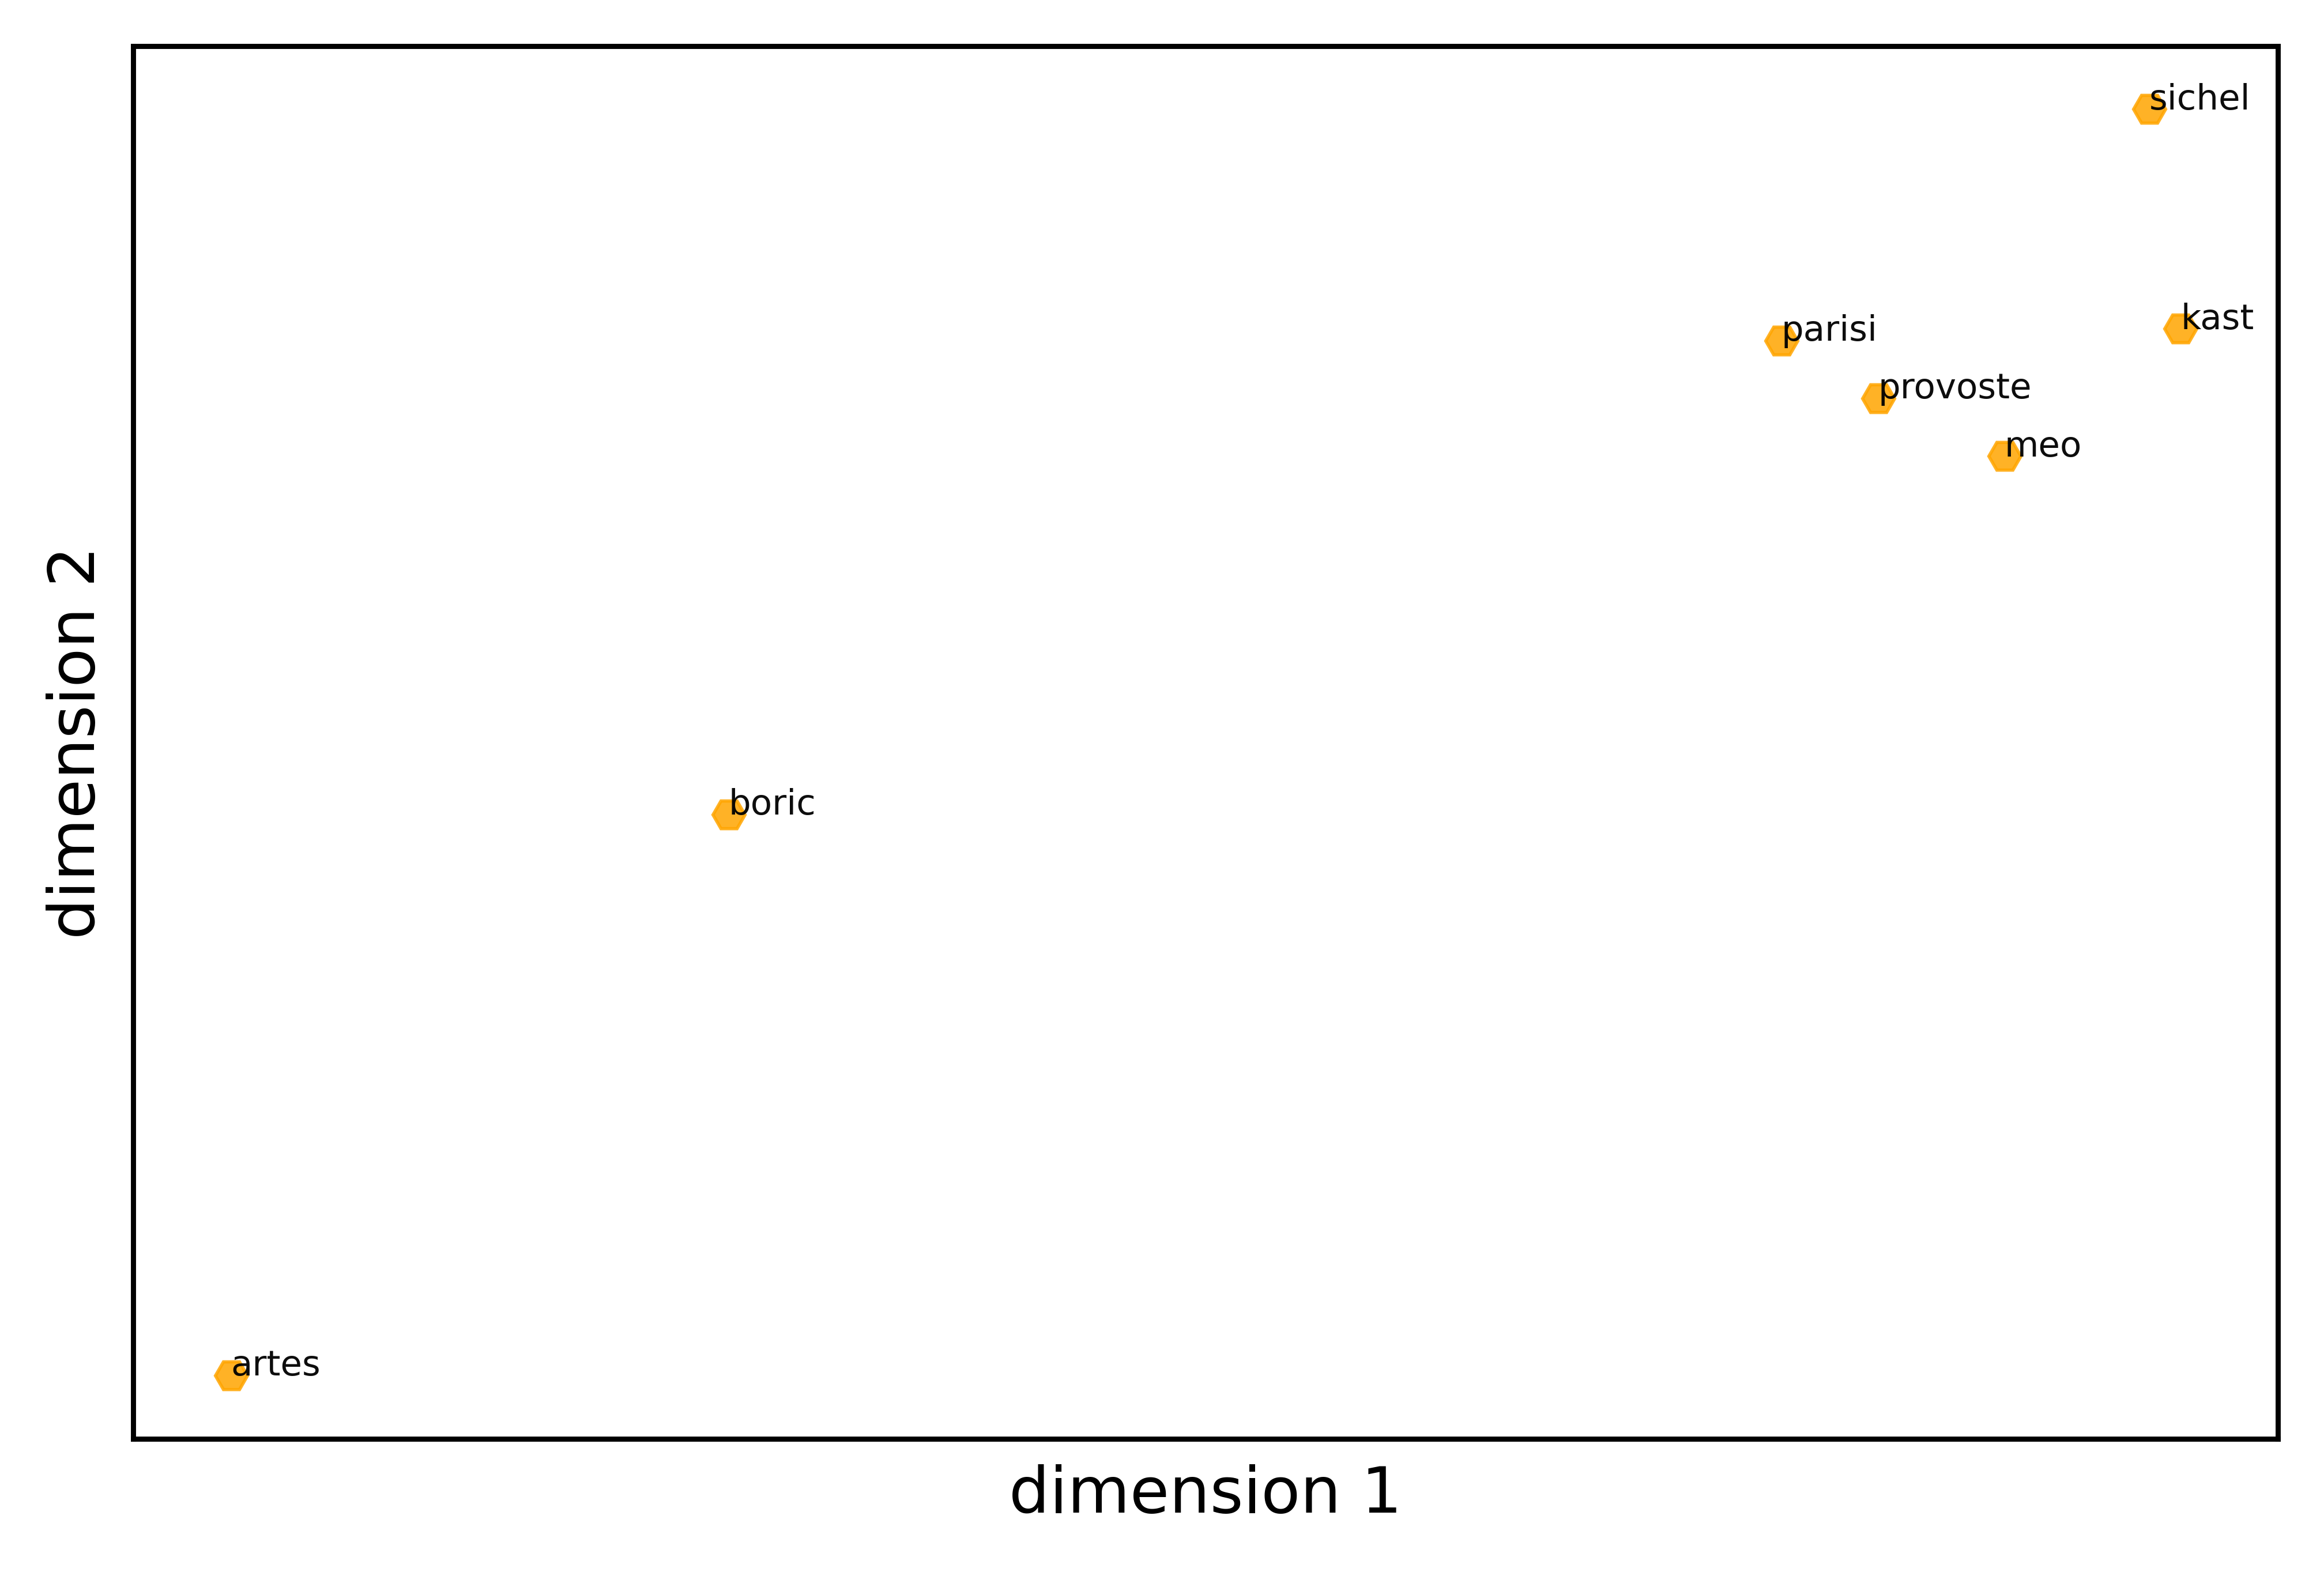

In [84]:
fig, ax = plt.subplots(dpi=800)

for candidatx in lecturabilidad.keys():
    i = list(lecturabilidad.keys()).index(candidatx)
    ax.annotate(candidatx, color='k', xy=(x[i]-0.0004,y[i]-0.0004), fontsize=5.5, alpha=0.95)

ax.plot([x[i] for i in [list(lecturabilidad.keys()).index(candidatx) for candidatx in lecturabilidad.keys()]],[y[i] for i in [list(lecturabilidad.keys()).index(candidatx) for candidatx in lecturabilidad.keys()]],'H',color='orange',markersize=5,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True)

plt.grid(False)
#plt.title(str(len(languages))+' languages with '+str(len(keys_comunes))+' features',fontsize=10)
ax.set_yticks([])
ax.set_xticks([])
#plt.legend(loc='best',fontsize=7)
plt.ylabel(r'dimension 2',fontsize=10)
plt.xlabel(r'dimension 1',fontsize=10)
plt.rcParams.update({'font.size': 10})
#plt.savefig('TSNE_sails.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [87]:
" ".join(['a','b','c'])

'a b c'

In [90]:
lecturabilidad_oraciones = {candidatx:[] for candidatx in datos_all.keys()}

In [91]:
for candidatx in datos_all.keys():
    oraciones = datos_all[candidatx]
    for oracion in oraciones:
        text = " ".join(oracion)
        lecturabilidad_oraciones[candidatx]+=[textstat.fernandez_huerta(text)]

C:\Users\jxver\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jxver\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jxver\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

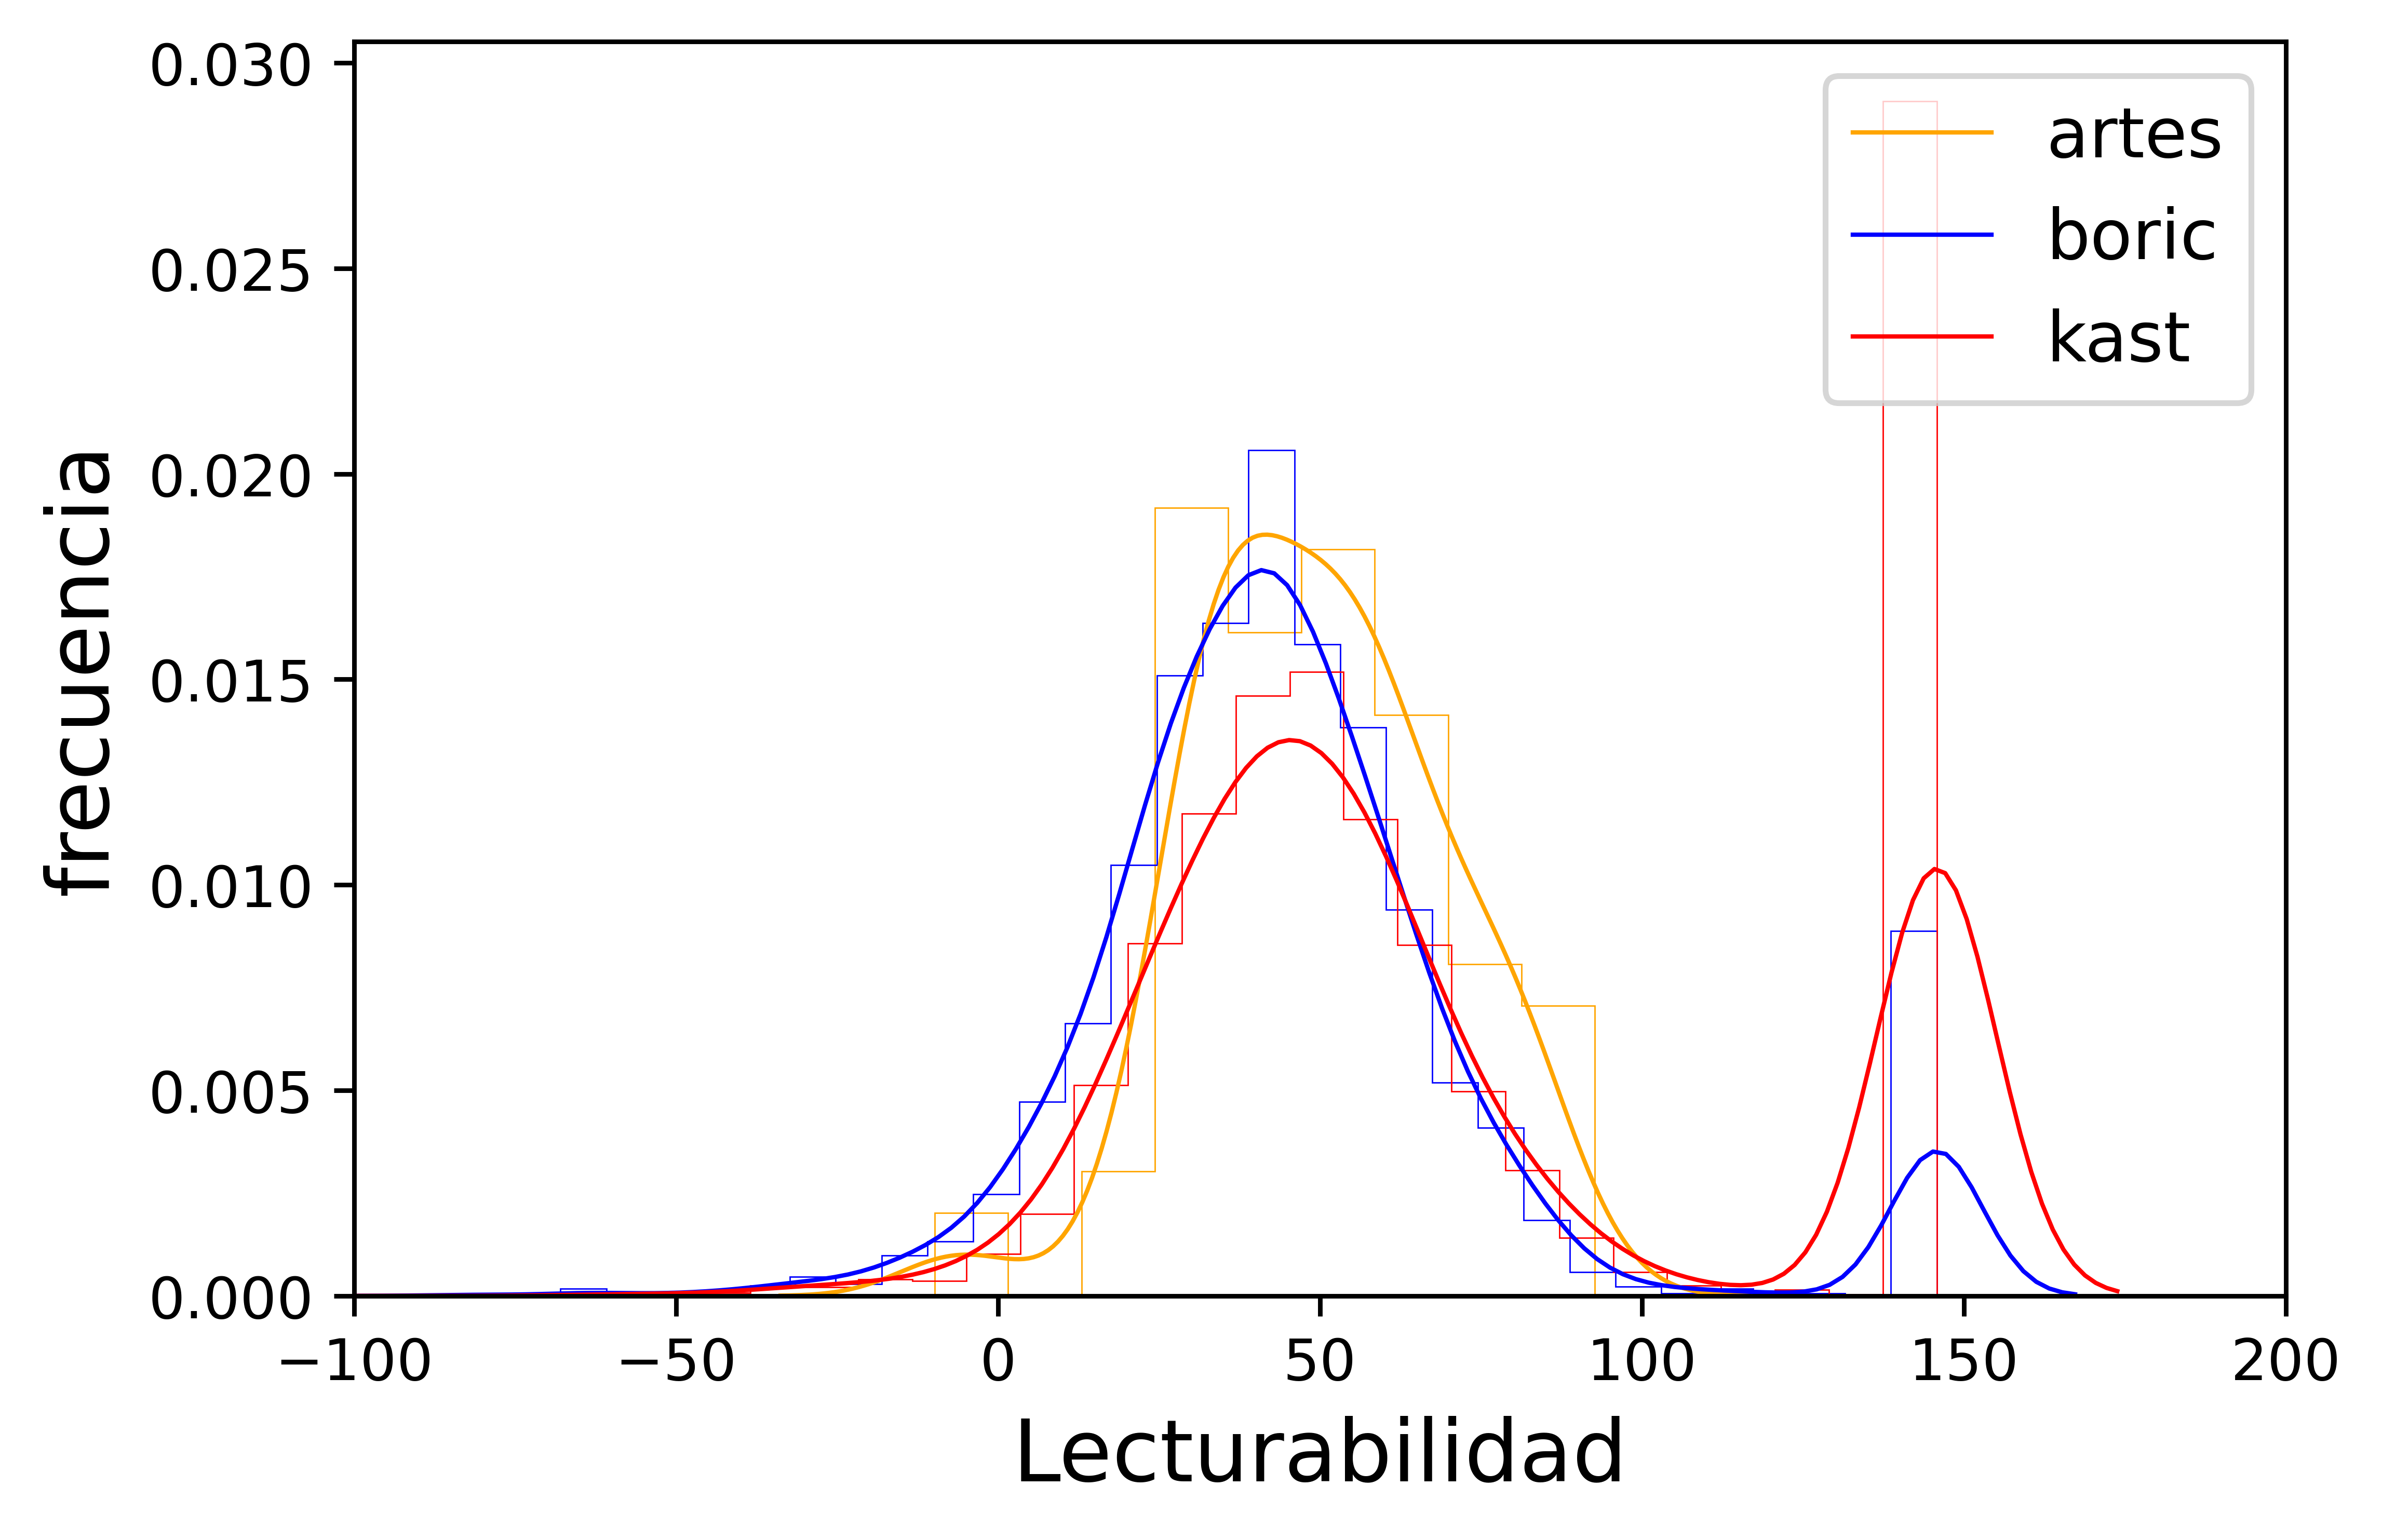

In [93]:
fig, ax = plt.subplots(dpi=800)

for candidatx in ['artes','boric','kast']:

    ax = sns.distplot(lecturabilidad_oraciones[candidatx],kde_kws={"color": colors[candidatx], "lw": 0.75, "linestyle":"-","label": candidatx},
                  hist_kws={"histtype": "step", "linewidth": 0.25,
                            "alpha": 1, "color": colors[candidatx]},hist=True)

plt.xlim((-100, 200)) 
plt.legend(loc='best',fontsize=12)
plt.xlabel(r'Lecturabilidad',fontsize=15)
plt.ylabel(r'frecuencia',fontsize=15)
plt.rcParams.update({'font.size': 10})
#plt.savefig('largo_oraciones.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

## 6. K-means :)

In [96]:
import pandas as pd

sails = pd.read_pickle('rasgos_sails.p')

In [97]:
id_family = pd.read_pickle('families.p')

In [98]:
sails.keys()

dict_keys(['agua1253', 'yane1238', 'apur1254', 'apal1257', 'arhu1242', 'mapu1245', 'karo1305', 'araw1276', 'awet1244', 'cent2142', 'bora1263', 'boro1282', 'baur1253', 'chip1262', 'mose1249', 'cavi1250', 'chay1248', 'chol1284', 'coca1259', 'colo1256', 'cube1242', 'desa1247', 'emer1243', 'nort2972', 'guat1253', 'hixk1239', 'inga1252', 'iton1250', 'jama1261', 'hupd1244', 'juru1256', 'kama1373', 'kari1311', 'daww1239', 'awac1239', 'kano1245', 'leco1242', 'lako1248', 'sate1243', 'mats1244', 'moco1246', 'maku1278', 'wich1262', 'mund1330', 'movi1243', 'moch1259', 'pare1272', 'wari1268', 'paez1247', 'pila1245', 'puin1248', 'hual1241', 'sout2991', 'sout2990', 'sant1432', 'tena1240', 'yauy1235', 'ayac1239', 'cusc1236', 'caja1238', 'imba1240', 'nort2980', 'paca1245', 'sanm1289', 'huay1240', 'sala1272', 'jauj1238', 'cane1242', 'rikb1245', 'saba1268', 'nina1238', 'ship1254', 'saki1248', 'tari1256', 'tehu1242', 'tapi1253', 'trum1247', 'trio1238', 'ikpe1245', 'urar1246', 'uruu1244', 'wara1303', 'wayo

In [109]:
sails['mapu1245']

{'ARGEX5-1': 'ARGEX5-1-C',
 'ARGEX5-2': 'ARGEX5-2-C',
 'ARGEX5-3': 'ARGEX5-3-C',
 'ARGEX5-4': 'ARGEX5-4-C',
 'ARGEX5-5': 'ARGEX5-5-D',
 'ARGEX5-6': 'ARGEX5-6-C',
 'ARGEX5-7': 'ARGEX5-7-C',
 'ARGEX5-8': 'ARGEX5-8-C',
 'ARGEX5-9': 'ARGEX5-9-B'}

In [110]:
sails = {language:list(sails[language].values()) for language in sails.keys()}

In [111]:
sails_values = []

for language in sails.keys():
    sails_values+=sails[language]

In [112]:
sails_values = list(set(sails_values))

In [113]:
sails_values_dict = dict(zip(sails_values,range(len(sails_values))))

In [114]:
sails_values_dict

{'ARGEX5-8-B': 0,
 'ARGEX5-1-C': 1,
 'ARGEX5-5-B': 2,
 'ARGEX5-6-C': 3,
 'ARGEX5-5-D': 4,
 'ARGEX5-3-B': 5,
 'ARGEX5-4-C': 6,
 'ARGEX5-8-A': 7,
 'ARGEX5-9-B': 8,
 'ARGEX5-7-D': 9,
 'ARGEX5-3-C': 10,
 'ARGEX5-7-A': 11,
 'ARGEX5-9-A': 12,
 'ARGEX5-7-C': 13,
 'ARGEX5-7-B': 14,
 'ARGEX5-7-E': 15,
 'ARGEX5-9-C': 16,
 'ARGEX5-2-B': 17,
 'ARGEX5-2-C': 18,
 'ARGEX5-4-B': 19,
 'ARGEX5-8-C': 20,
 'ARGEX5-5-C': 21,
 'ARGEX5-5-A': 22,
 'ARGEX5-6-B': 23,
 'ARGEX5-1-B': 24,
 'ARGEX5-6-A': 25}

In [115]:
sails = {language:[sails_values_dict[code] for code in sails[language]] for language in sails.keys()}

In [116]:
sails['mapu1245']

[1, 18, 10, 6, 4, 3, 13, 20, 8]

In [117]:
X=[]
for lengua in sails.keys():
    X+=[list(sails[lengua])]

In [118]:
from sklearn.manifold import TSNE

X = TSNE(n_components=2,perplexity=15,init='pca',random_state=0).fit_transform(X)

In [119]:
X

array([[ 536.6744   ,  -62.325558 ],
       [-404.75406  ,  196.48834  ],
       [-444.68457  , -503.49854  ],
       [-422.03784  , -397.70288  ],
       [ 416.47467  ,  291.04633  ],
       [-343.79822  ,  261.2258   ],
       [-422.03784  , -397.70288  ],
       [-422.03784  , -397.70288  ],
       [-479.8082   , -306.69415  ],
       [ 257.8829   ,  139.75958  ],
       [  93.299934 ,  420.45648  ],
       [-519.40955  , -436.65155  ],
       [-433.7685   ,  276.87878  ],
       [-366.0259   , -300.52005  ],
       [-273.6098   ,  320.78052  ],
       [ 533.08704  , -302.47855  ],
       [ 533.08704  , -302.47855  ],
       [-338.84113  , -472.15207  ],
       [-422.03784  , -397.70288  ],
       [  76.74895  , -167.11783  ],
       [ 183.60666  , -259.46918  ],
       [ 209.79283  , -199.63094  ],
       [-366.0259   , -300.52005  ],
       [  41.685455 ,  123.233734 ],
       [-357.4267   ,  351.2411   ],
       [-682.29706  , -306.18988  ],
       [ 343.13757  ,  270.42844  ],
 

In [120]:
x=list(zip(*list(X)))[0]
y=list(zip(*list(X)))[1]

In [121]:
from sklearn import metrics
from sklearn.cluster import KMeans
S_NN = {}
for k in [2,3,4,5,6,7,8,9,10]:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    labels = kmeans.labels_
    S_NN[k]=metrics.silhouette_score(X, labels, metric='euclidean')

In [122]:
S_NN

{2: 0.5242792,
 3: 0.4962921,
 4: 0.5636146,
 5: 0.593261,
 6: 0.5836523,
 7: 0.5664474,
 8: 0.58365226,
 9: 0.5906536,
 10: 0.60995543}

In [123]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_
labels_dict = dict(zip(sails.keys(),labels))

In [124]:
labels_dict

{'agua1253': 1,
 'yane1238': 0,
 'apur1254': 2,
 'apal1257': 2,
 'arhu1242': 1,
 'mapu1245': 0,
 'karo1305': 2,
 'araw1276': 2,
 'awet1244': 2,
 'cent2142': 1,
 'bora1263': 0,
 'boro1282': 2,
 'baur1253': 0,
 'chip1262': 2,
 'mose1249': 0,
 'cavi1250': 1,
 'chay1248': 1,
 'chol1284': 2,
 'coca1259': 2,
 'colo1256': 1,
 'cube1242': 1,
 'desa1247': 1,
 'emer1243': 2,
 'nort2972': 0,
 'guat1253': 0,
 'hixk1239': 2,
 'inga1252': 1,
 'iton1250': 0,
 'jama1261': 1,
 'hupd1244': 1,
 'juru1256': 1,
 'kama1373': 2,
 'kari1311': 2,
 'daww1239': 0,
 'awac1239': 0,
 'kano1245': 0,
 'leco1242': 2,
 'lako1248': 0,
 'sate1243': 2,
 'mats1244': 1,
 'moco1246': 0,
 'maku1278': 2,
 'wich1262': 0,
 'mund1330': 2,
 'movi1243': 2,
 'moch1259': 1,
 'pare1272': 2,
 'wari1268': 2,
 'paez1247': 0,
 'pila1245': 0,
 'puin1248': 1,
 'hual1241': 1,
 'sout2991': 1,
 'sout2990': 1,
 'sant1432': 1,
 'tena1240': 1,
 'yauy1235': 1,
 'ayac1239': 1,
 'cusc1236': 1,
 'caja1238': 1,
 'imba1240': 1,
 'nort2980': 1,
 'paca12

In [125]:
from collections import defaultdict

res = defaultdict(list)
for key, val in sorted(labels_dict.items()):
    res[val].append(key)

In [126]:
res = dict(res)

In [127]:
res

{1: ['agua1253',
  'arhu1242',
  'ayac1239',
  'caja1238',
  'cane1242',
  'cavi1250',
  'cent2142',
  'chay1248',
  'colo1256',
  'cube1242',
  'cusc1236',
  'desa1247',
  'hual1241',
  'huay1240',
  'hupd1244',
  'imba1240',
  'inga1252',
  'jama1261',
  'jauj1238',
  'juru1256',
  'mats1244',
  'moch1259',
  'nina1238',
  'nort2980',
  'paca1245',
  'puin1248',
  'sala1272',
  'sanm1289',
  'sant1432',
  'ship1254',
  'sout2990',
  'sout2991',
  'tari1256',
  'tehu1242',
  'tena1240',
  'trum1247',
  'uruu1244',
  'yami1256',
  'yauy1235'],
 2: ['apal1257',
  'apur1254',
  'araw1276',
  'awet1244',
  'boro1282',
  'chip1262',
  'chol1284',
  'coca1259',
  'emer1243',
  'hixk1239',
  'ikpe1245',
  'kama1373',
  'kari1311',
  'karo1305',
  'leco1242',
  'maku1278',
  'movi1243',
  'mund1330',
  'nhen1239',
  'pare1272',
  'rikb1245',
  'saki1248',
  'sate1243',
  'trio1238',
  'urar1246',
  'wara1303',
  'wari1268',
  'wayo1238',
  'xava1240'],
 0: ['awac1239',
  'baur1253',
  'bora12

In [128]:
colors = dict(zip(res.keys(),[['o','b'],['D','orange'],['H','fuchsia']]))

In [129]:
colors

{1: ['o', 'b'], 2: ['D', 'orange'], 0: ['H', 'fuchsia']}

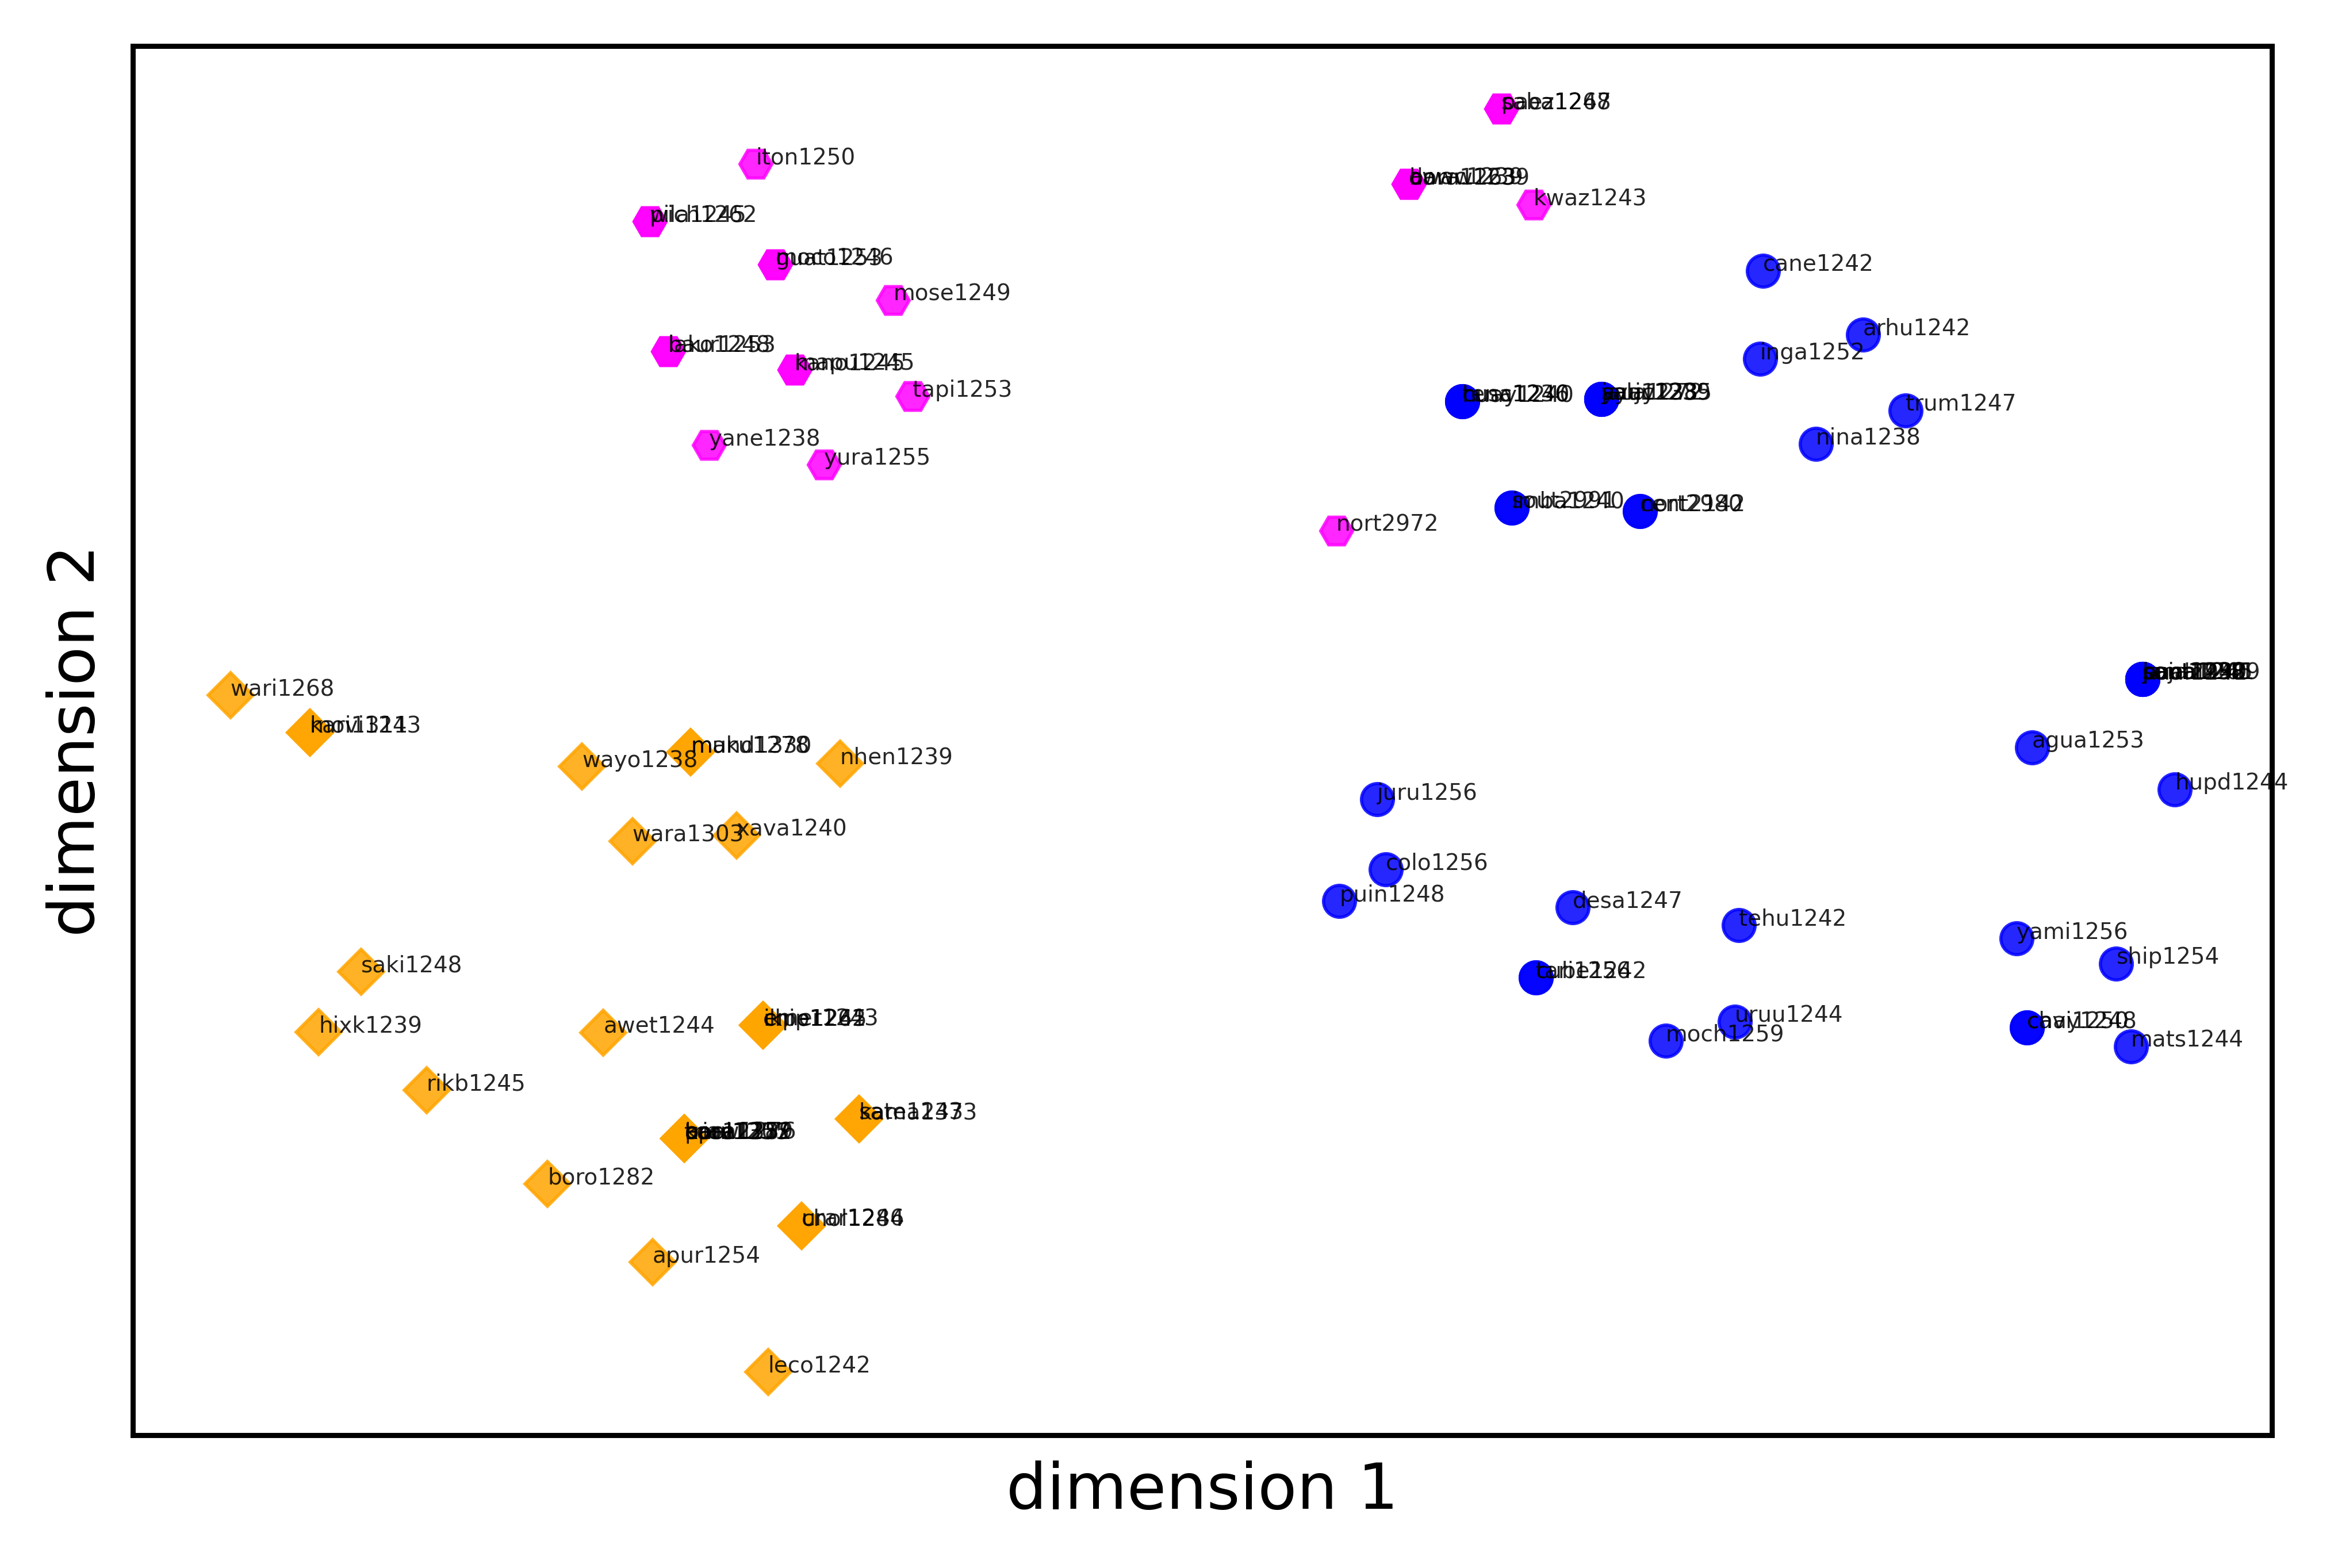

In [130]:
fig, ax = plt.subplots(dpi=800)

for lengua in sails.keys():
    i = list(sails.keys()).index(lengua)
    ax.annotate(lengua, color='k', xy=(x[i]-0.0004,y[i]-0.0004), fontsize=3.5, alpha=0.85)
#        ax.annotate(labels[i], weight='demi', color='k', xy=(x[i]-0.05,y[i]-0.05), fontsize=4, alpha=0.85)

for group in res.keys():
    ax.plot([x[i] for i in [list(sails.keys()).index(language) for language in sails.keys() if labels_dict[language]==group]],[y[i] for i in [list(sails.keys()).index(language) for language in sails.keys() if labels_dict[language]==group]],marker=colors[group][0],color=colors[group][1],linewidth=0,markersize=5,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True)

plt.grid(False)
#plt.title(str(len(languages))+' languages with '+str(len(keys_comunes))+' features',fontsize=10)
ax.set_yticks([])
ax.set_xticks([])
#plt.legend(loc='best',fontsize=7)
plt.ylabel(r'dimension 2',fontsize=10)
plt.xlabel(r'dimension 1',fontsize=10)
plt.rcParams.update({'font.size': 10})
#plt.savefig('TSNE_sails.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [ ]:
indice_marcacion = {lengua:0 for lengua in dict_present.keys()}

lista_dicts = [d1,d2,d3,...]

for lengua in indice_marcacion.keys():
    for D in lista_dicts:
        valor = D[lengua]
        if valor!='N':
            indice_marcacion[lengua]+=1/7

In [ ]:
indice_marcacion = {lengua:0.4,...}

lista_indices = list(indice_marcacion.values())